In [ ]:
%pip install -U -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"USERNAME","key":"KEY"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kazakovyurii/data-of-rotary-machine-defects

 99% 255M/257M [00:02<00:00, 100MB/s] 
100% 257M/257M [00:02<00:00, 98.5MB/s]


In [ ]:
import zipfile
import re

raw_regex_list = [r"data_3_.*", r"data_10_.*", r"data_1_.*"]

regex_list = []
for raw_regex in raw_regex_list:
    regex_list.append(re.compile(raw_regex))

with zipfile.ZipFile("/content/data-of-rotary-machine-defects.zip", "r") as zp:
    files = zipfile.ZipFile.infolist(zp)
    for file in files:
        if any(r.match(file.filename) for r in regex_list):
            print(f"Extract: {file.filename}")
            with open(file.filename, "wb") as f:
                f.write(zp.read(file.filename))

Extract: data_10_1.csv
Extract: data_10_3.csv
Extract: data_1_1.csv
Extract: data_3_1.csv
Extract: data_3_3.csv


# Read and merge datasets

#### Code

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = [
    pd.read_csv('data_1_1.csv'),
    pd.read_csv('data_3_1.csv'),
    pd.read_csv('data_3_3.csv'),
    pd.read_csv('data_10_1.csv'),
    pd.read_csv('data_10_3.csv'),
]

A function that combines dataframes line by line. Since dataframes contain data sorted by time, in order to combine dataframes, you need to keep the original size of the dataframe. The cell of the resulting dataframe is the average between the cell values of the selected dataframes.

In [ ]:
def merge_row_by_row(datasets):
    data = []
    df_lists = [ df.values.tolist() for df in datasets ]
    columns = datasets[0].columns.tolist()
    rows_num = len(df_lists[0])

    for i in range(rows_num):
        row = [0]*len(columns)
        for df in df_lists:
            for j, cell in enumerate(df[i]): 
                row[j] = (row[j] + cell) / 2 if row[j] != 0 else cell
        data.append(row)

    result = pd.DataFrame(data, columns=columns)
    return result

#### Results

In [ ]:
normal_data = [
    data[0], 
    data[1], 
    data[3]
]
defects_data = [
    data[2], 
    data[4]
]

normal_df = merge_row_by_row(normal_data)
normal_df.to_csv("normal_data.csv")
print(f"Normal data is saved to CSV. Shape:{normal_df.shape}")

defects_df = merge_row_by_row(defects_data)
defects_df.to_csv("defects_data.csv")
print(f"Defects data is saved to CSV. Shape:{defects_df.shape}")

Normal data is saved to CSV. Shape:(601000, 10)
Defects data is saved to CSV. Shape:(601000, 10)


In [ ]:
normal_df.head()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
0,5.54950,6.42200,6.00975,7.17550,5.63200,6.57825,6.15350,7.34100,1099.73275,1099.946
1,5.62525,6.40650,6.05750,7.15025,5.65000,6.38475,6.06525,7.13825,1099.73275,1099.946
2,5.70000,6.39425,6.06925,7.16925,5.68750,6.41725,6.07575,7.14150,1099.73275,1099.946
3,5.71125,6.41875,6.09575,7.15750,5.72100,6.48850,6.12550,7.18550,1099.73275,1099.946
4,5.68550,6.39375,6.13925,7.19325,5.65225,6.55675,6.10675,7.20825,1099.73275,1099.946


In [ ]:
defects_df.head()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
0,5.638,6.2975,6.1540,7.0795,5.5715,6.5435,6.2085,7.2300,1092.389,1098.649
1,5.367,6.4320,6.1270,7.1135,5.4340,6.4165,6.0990,7.1275,1092.389,1098.649
2,5.477,6.4145,6.0935,7.1855,5.4310,6.3945,6.0855,7.1135,1092.389,1098.649
3,5.574,6.4680,6.1765,7.1030,5.5390,6.5065,6.1670,7.1495,1092.389,1098.649
4,5.560,6.4180,6.1710,6.9935,5.5530,6.4945,6.1910,7.1275,1092.389,1098.649


# Data description

## Numeric description

#### Code

In [ ]:
def describe(df):
    d = df.describe()
    d.loc["range"] = d.loc["max"] - d.loc["min"]
    d.loc["null values"] = df.isnull().sum()
    d = d.transpose()
    d["mode"] = df.mode().head(1).transpose()
    d["variance"] = df.var().transpose()
    d = d.rename(columns={"50%": "median"})
    d = d.rename(columns={"count": "non-null values"})
    d = d.reindex(
        columns=[
            "mean",
            "variance",
            "std",
            "median",
            "mode",
            "max",
            "min",
            "range",
            "25%",
            "75%",
            "non-null values",
            "null values",
        ]
    )
    d = d.reindex(
        [
            "Fluctuations_X_in_the_left_bearing",
            "Fluctuations_X_in_the_left_bearing_smooth",
            "Fluctuations_Y_in_the_left_bearing",
            "Fluctuations_Y_in_the_left_bearing_smooth",
            "Fluctuations_X_in_the_right_bearing",
            "Fluctuations_X_in_the_right_bearing_smooth",
            "Fluctuations_Y_in_the_right_bearing",
            "Fluctuations_Y_in_the_right_bearing_smooth",
            "Temperature_in_the_left_bearing",
            "Temperature_in_the_right_bearing",
        ]
    )
    return d

#### Results

In [ ]:
describe(normal_df)

,mean,variance,std,median,mode,max,min,range,25%,75%,non-null values,null values
Fluctuations_X_in_the_left_bearing,5.635829,0.002401,0.049004,5.63550,5.60125,5.96375,5.39525,0.56850,5.59975,5.67275,601000.0,0.0
Fluctuations_X_in_the_left_bearing_smooth,5.635829,0.001843,0.042934,5.63550,5.60300,5.79350,5.48900,0.30450,5.60125,5.67125,601000.0,0.0
Fluctuations_Y_in_the_left_bearing,6.470865,0.002765,0.052581,6.47100,6.49325,6.88650,6.15000,0.73650,6.43450,6.50700,601000.0,0.0
Fluctuations_Y_in_the_left_bearing_smooth,6.470865,0.001878,0.043341,6.47150,6.48850,6.66200,6.31700,0.34500,6.43750,6.50425,601000.0,0.0
Fluctuations_X_in_the_right_bearing,6.091049,0.002652,0.051498,6.08950,6.07625,6.43200,5.85275,0.57925,6.05425,6.12650,601000.0,0.0
Fluctuations_X_in_the_right_bearing_smooth,6.091048,0.002195,0.046849,6.08925,6.08225,6.27400,5.94425,0.32975,6.05600,6.12450,601000.0,0.0
Fluctuations_Y_in_the_right_bearing,7.202588,0.002593,0.050920,7.20100,7.20650,7.55225,6.93875,0.61350,7.16600,7.23725,601000.0,0.0
Fluctuations_Y_in_the_right_bearing_smooth,7.202589,0.002045,0.045221,7.20125,7.20425,7.40975,7.04775,0.36200,7.16800,7.23550,601000.0,0.0
Temperature_in_the_left_bearing,1112.463721,21.705707,4.658938,1113.77300,1116.93775,1117.66875,1099.73275,17.93600,1109.60300,1116.36900,601000.0,0.0
Temperature_in_the_right_bearing,1109.931202,15.823196,3.977838,1110.79775,1099.94600,1115.19850,1099.94600,15.25250,1107.31450,1113.24125,601000.0,0.0


In [ ]:
describe(defects_df)

,mean,variance,std,median,mode,max,min,range,25%,75%,non-null values,null values
Fluctuations_X_in_the_left_bearing,5.487652,0.003644,0.060362,5.4880,5.4930,5.8765,5.1940,0.6825,5.4445,5.5285,601000.0,0.0
Fluctuations_X_in_the_left_bearing_smooth,5.487653,0.002753,0.052469,5.4880,5.5085,5.6750,5.3275,0.3475,5.4485,5.5245,601000.0,0.0
Fluctuations_Y_in_the_left_bearing,6.474533,0.004344,0.065906,6.4740,6.4755,7.1340,6.1295,1.0045,6.4300,6.5175,601000.0,0.0
Fluctuations_Y_in_the_left_bearing_smooth,6.474533,0.002972,0.054517,6.4745,6.4755,6.7615,6.2760,0.4855,6.4350,6.5130,601000.0,0.0
Fluctuations_X_in_the_right_bearing,6.130818,0.003052,0.055248,6.1340,6.1440,6.4815,5.7720,0.7095,6.0925,6.1700,601000.0,0.0
Fluctuations_X_in_the_right_bearing_smooth,6.130817,0.002305,0.048012,6.1340,6.1510,6.3155,5.9725,0.3430,6.0950,6.1670,601000.0,0.0
Fluctuations_Y_in_the_right_bearing,7.151936,0.003069,0.055398,7.1520,7.1470,7.7090,6.8405,0.8685,7.1145,7.1885,601000.0,0.0
Fluctuations_Y_in_the_right_bearing_smooth,7.151938,0.002183,0.046719,7.1525,7.1640,7.3720,6.9640,0.4080,7.1175,7.1860,601000.0,0.0
Temperature_in_the_left_bearing,1113.797894,32.169734,5.671837,1115.1535,1114.3385,1119.5615,1092.3890,27.1725,1112.4445,1117.7510,601000.0,0.0
Temperature_in_the_right_bearing,1112.721066,18.040417,4.247401,1113.9735,1117.2810,1117.3575,1098.6490,18.7085,1110.2160,1116.3655,601000.0,0.0


## Graphical description

### Boxplot

#### Why boxplots

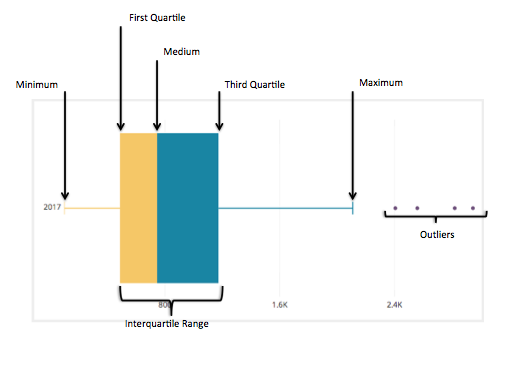

Boxplots allow to get a clear summary of large amounts of data.
This summary includes: 
- Median (50%);
- Upper quartile (75%);
- Lower quartile (25%);
- Minimum value;
- Maximum value;
- Outliers.

Types of observations that can be made based on a boxplot:
- What are the key values, for example: mean, median of the 25th percentile, and so on;
- Are there outliers and what are their values;
- Whether the data is symmetric;
- How tightly the data is grouped;
- Whether the data is shifted and, if so, in which direction.

#### Code

Necessary libs:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

from IPython.display import Image

Boxplot drawing function:

In [ ]:
def boxplot(df, labels, ax, ylim=None, ylabel=None):
    flierprops = dict(marker="o", markersize=2)

    for i, col in enumerate(labels):
        ax.boxplot(df[col], positions=[i + 1], flierprops=flierprops)

    ax.tick_params(labelsize=6)
    ax.set_xticklabels(labels=labels)
    if ylim:
        ax.set_ylim(ylim)
    if ylabel:
        ax.set_ylabel(ylabel)

Draw boxplots with shared Y-axis:

In [ ]:
def compare_boxplots(df1, df2, column_name, ylabel, filename, ax0title="Normal data", ax1title="Defects data"):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(17, 5))

    boxplot(
        df1,
        column_name,
        ax[0],
        ylabel=ylabel,
    )
    ax[0].set_title(ax0title)

    boxplot(
        df2,
        column_name,
        ax[1],
    )
    ax[1].set_title(ax1title)

    plt.suptitle('   &   '.join(column_name).replace('_',' '))

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig(f"{filename}.png", bbox_inches="tight")
    plt.close(fig)

#### Results

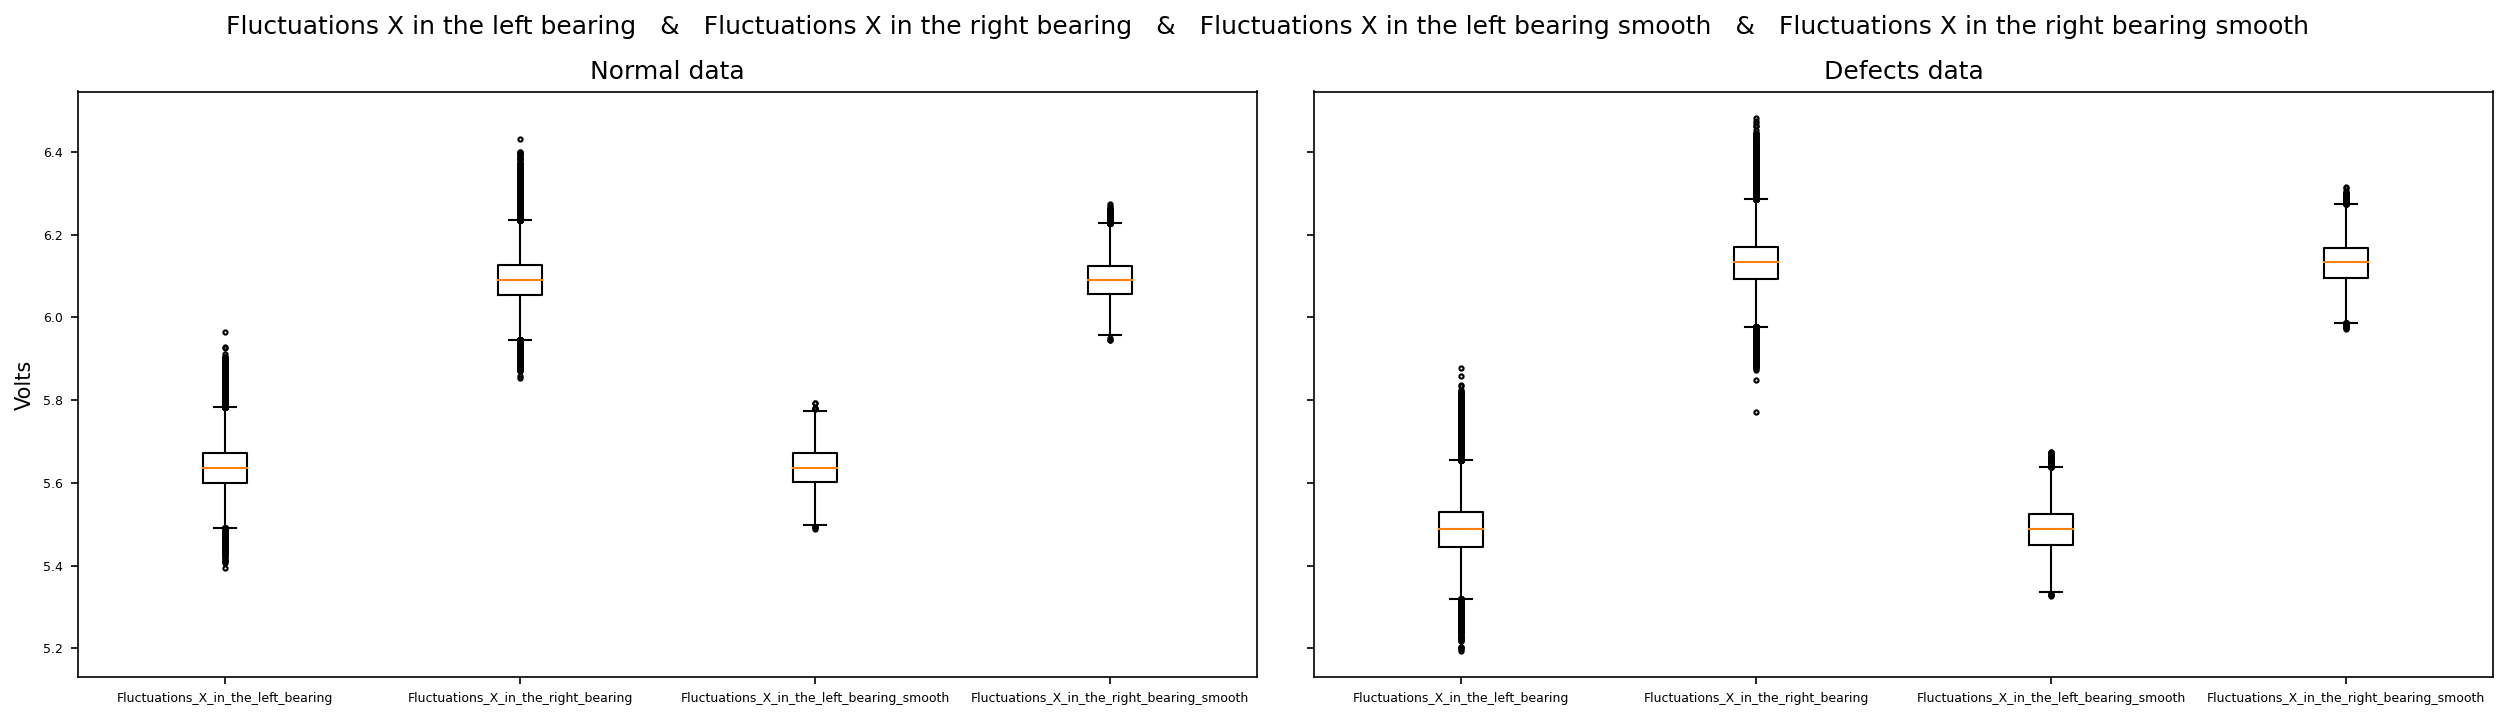

In [ ]:
column_name = [
    "Fluctuations_X_in_the_left_bearing",
    "Fluctuations_X_in_the_right_bearing",
    "Fluctuations_X_in_the_left_bearing_smooth",
    "Fluctuations_X_in_the_right_bearing_smooth"    
]

label = column_name[0]

compare_boxplots(normal_df, defects_df, column_name, 'Volts', label)

img = Image(f'{label}.png')
img

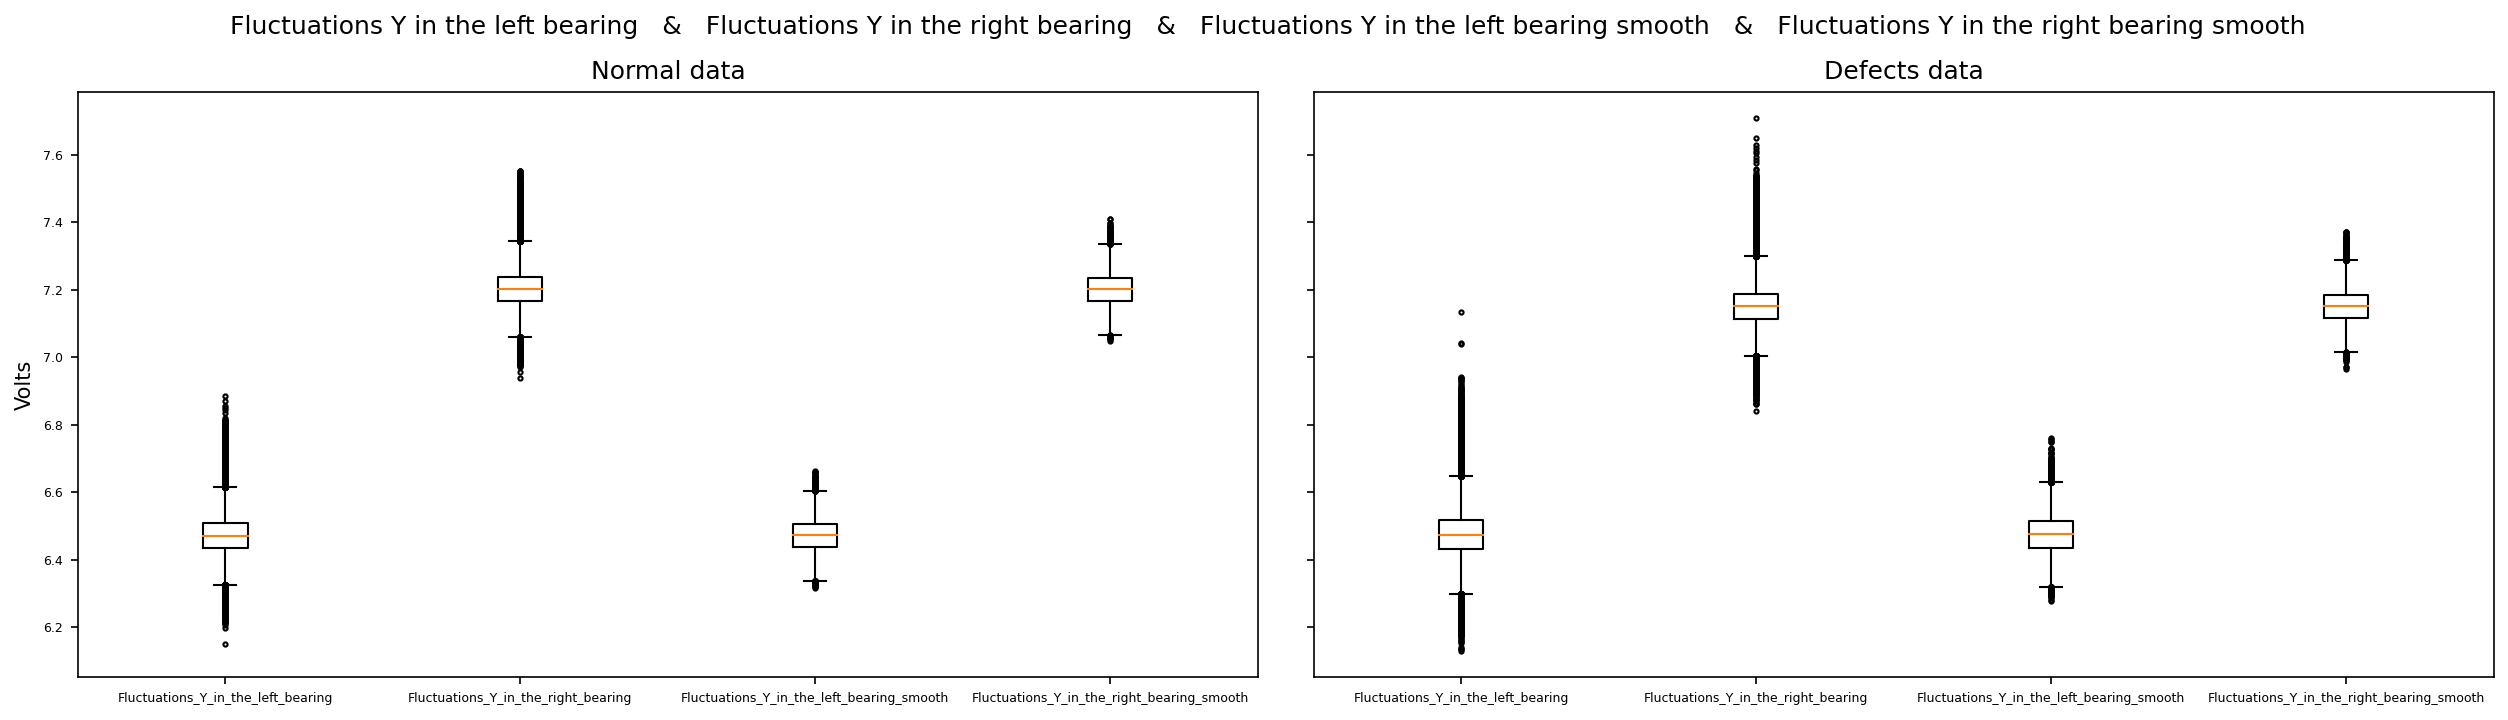

In [ ]:
column_name = [
    "Fluctuations_Y_in_the_left_bearing",
    "Fluctuations_Y_in_the_right_bearing",
    "Fluctuations_Y_in_the_left_bearing_smooth",
    "Fluctuations_Y_in_the_right_bearing_smooth"    
]

label = column_name[0]

compare_boxplots(normal_df, defects_df, column_name, 'Volts', label)

img = Image(f'{label}.png')
img

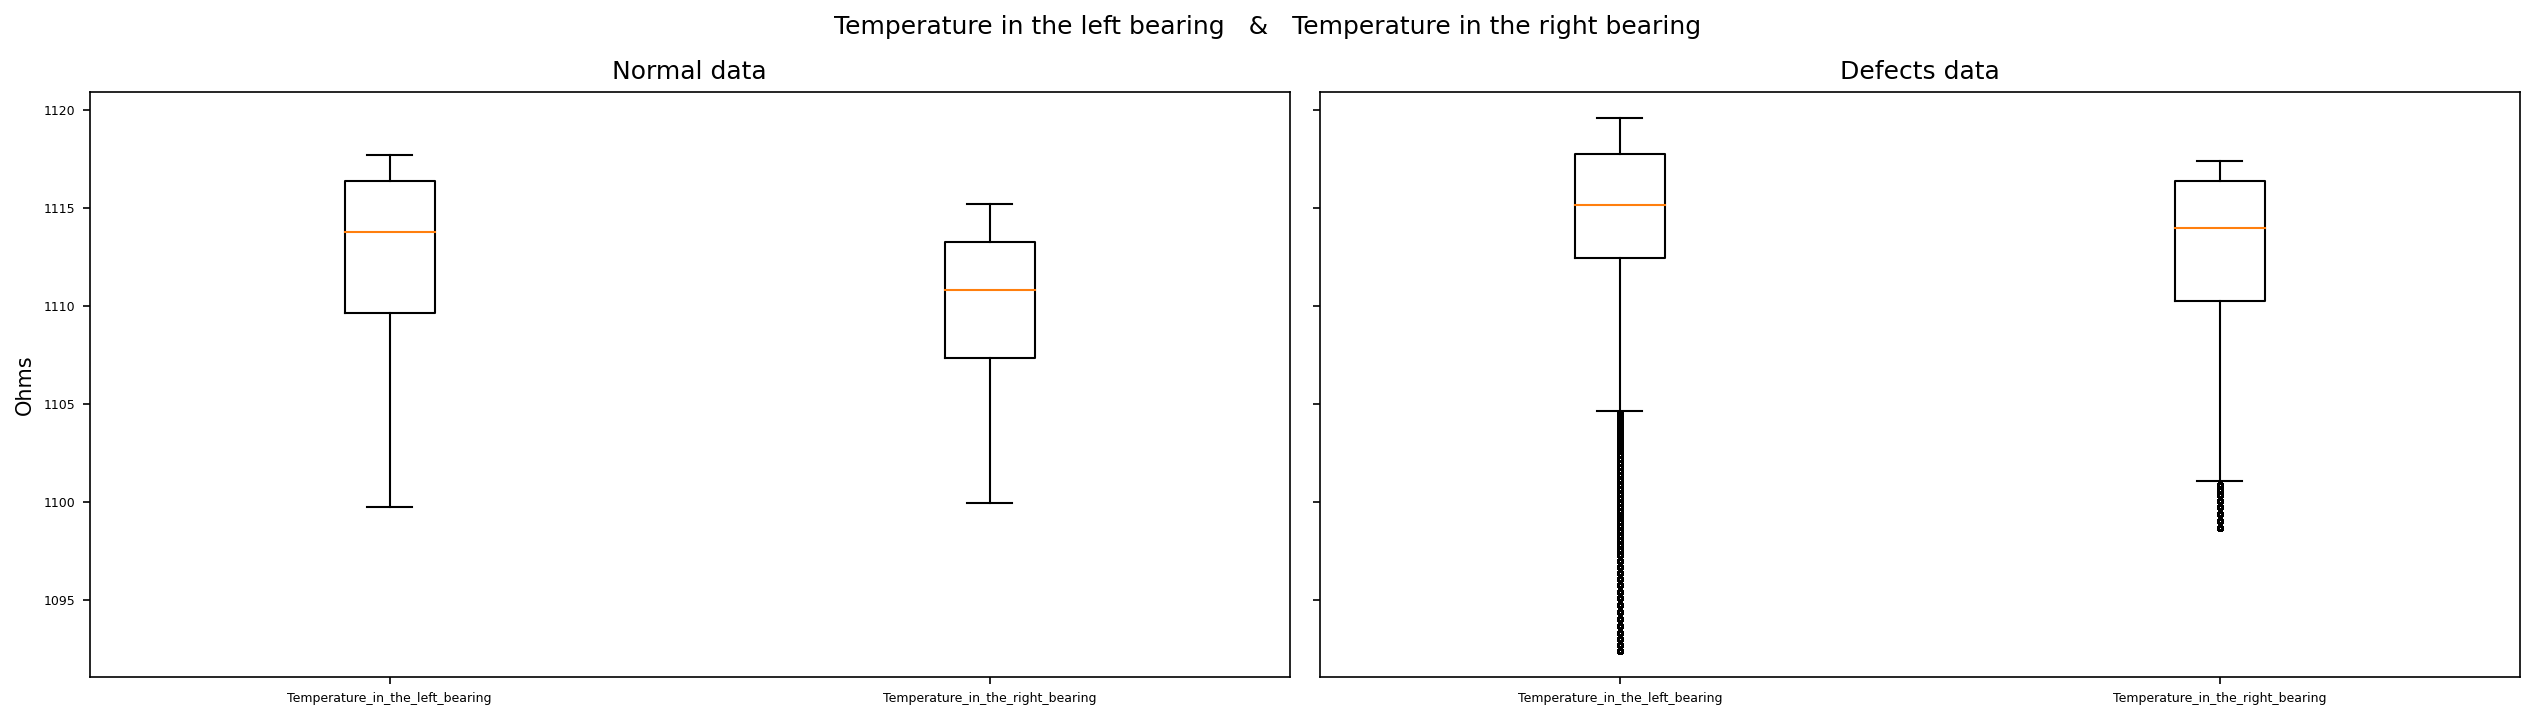

In [ ]:
column_name = [
    "Temperature_in_the_left_bearing", 
    "Temperature_in_the_right_bearing"
]

label = column_name[0]

compare_boxplots(normal_df, defects_df, column_name, 'Ohms', label)

img = Image(f'{label}.png')
img

### Correlation heatmap

#### Code

In [ ]:
import seaborn as sns

Heatmap correlation triangle drawing function. Weak correlation is omitted.

In [ ]:
def heatmap(df, ax=None):
    corr = df.corr()
    # Filter moderate and strong correlation
    dfCorr = corr[((corr >= .3) | (corr <= -.3))]
    mask = np.triu(np.ones_like(corr))
    ax.set_title("")
    sns.heatmap(
        dfCorr, 
        cbar=False, 
        mask=mask,
        ax=ax, 
        square=True, 
        annot=True, 
        cmap='coolwarm',
        vmin=-1,
        vmax=1,
    )

    c1 = dfCorr.where(np.triu(np.ones(dfCorr.shape), k=1).astype(bool))
    c1 = c1.unstack().dropna()
    c1 = c1.sort_values(ascending = False)
    return c1

In [ ]:
def draw_heatmaps(data, titles):
    fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(11, 6))
    
    for i, df in enumerate(data):
        corr = heatmap(df, ax[i])
        corr.to_csv(f"{titles[i]}_corr.csv")

        ax[i].title.set_text(f"{titles[i]} correlation heatmap")
        ax[i].tick_params(
                top=False,
                bottom=False,
                left=False,
                right=False,
        )

    fig.savefig("heatmaps.png", bbox_inches="tight")
    plt.close(fig)

In [ ]:
def show_corr_table(title):
    df = pd.read_csv(f"{title}_corr.csv")
    df.columns = ["Variable", "Correlates with", "Coefficient"]
    df = df.sort_values(['Variable', 'Coefficient'], ascending = [True, False])
    print(title)
    display(df)

#### Results

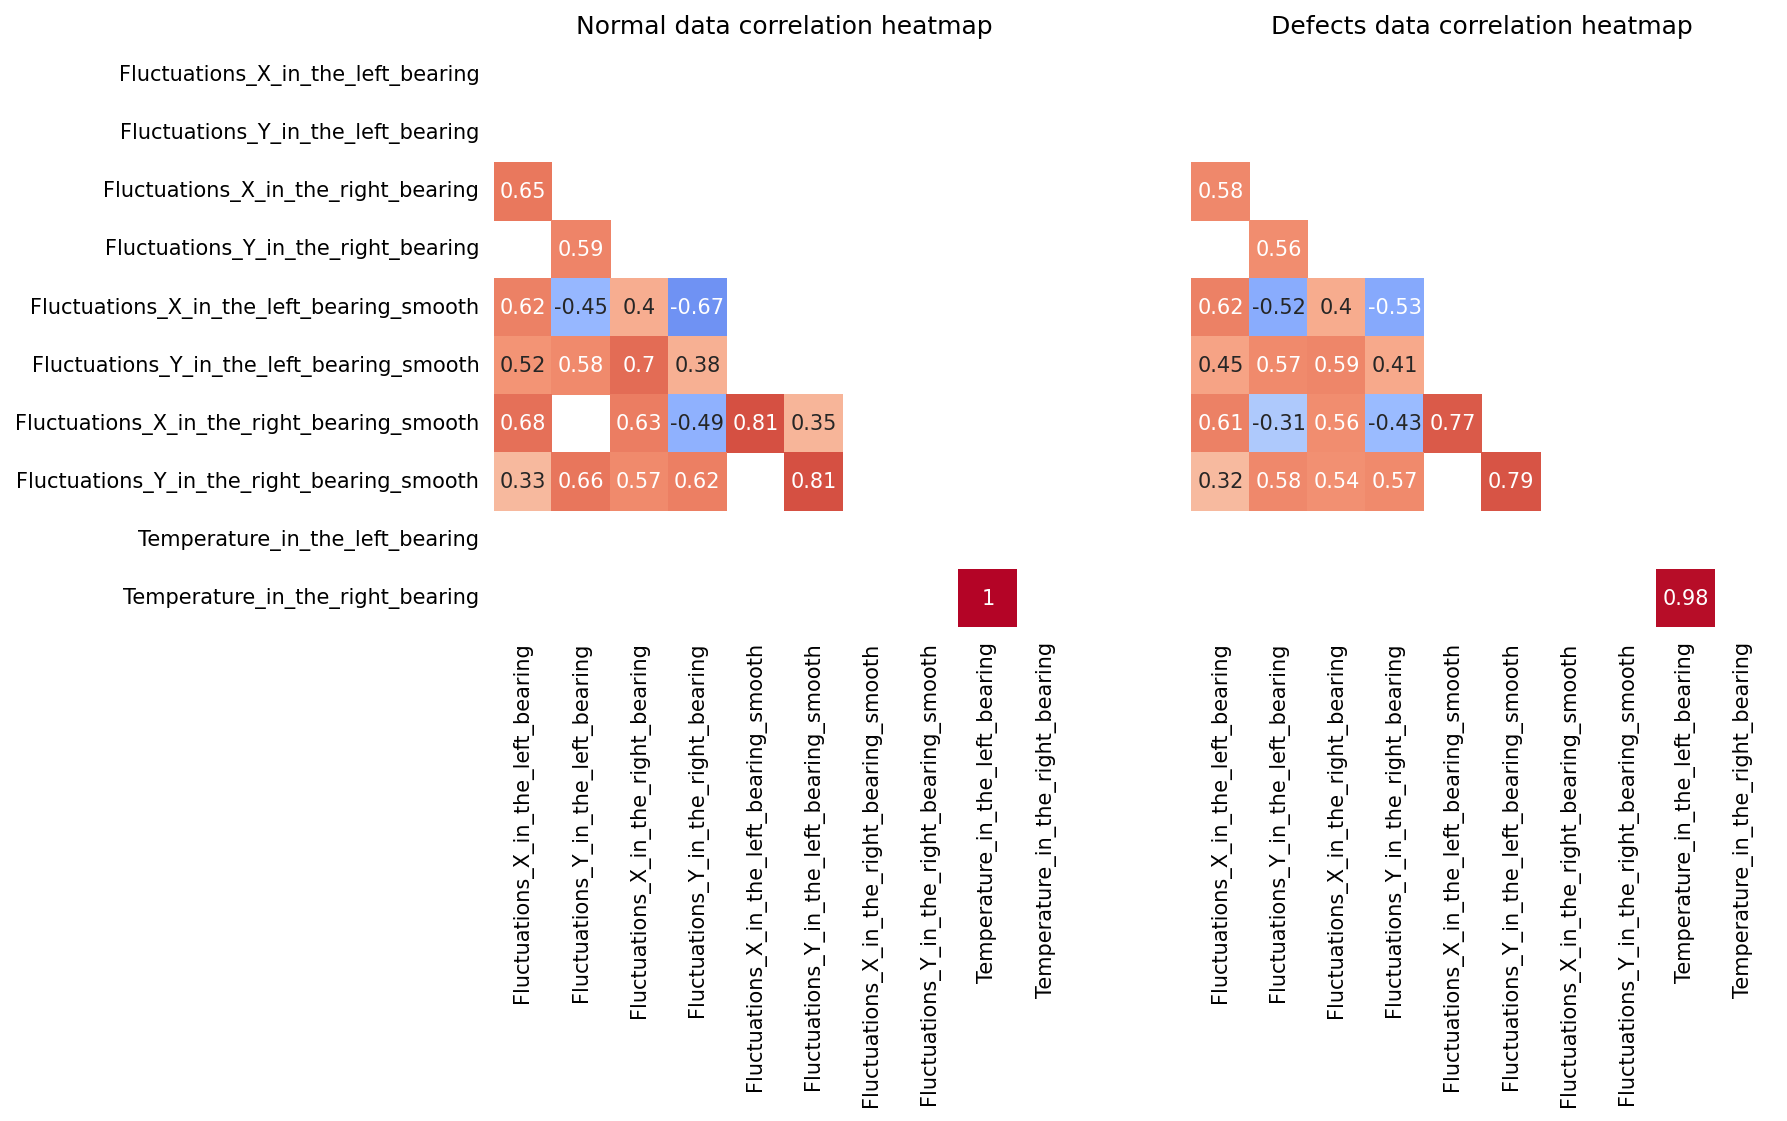

In [ ]:
titles = ["Normal data", "Defects data"] 
data = [normal_df, defects_df]
draw_heatmaps(data, titles)

img = Image("heatmaps.png", width=1000)
img

The same correlation results presented in the table format. The rows are grouped by variable name and sorted in descending order by correlation coefficient:

In [ ]:
# show_corr_table("Normal data")

In [ ]:
# show_corr_table("Defects data")

### Lineplot of differences

In [ ]:
difference_df = defects_df.subtract(normal_df)

#### Code

In [ ]:
class SparkLine(object):
    '''
    A SparkLine object that can be plotted on a Matplotlib Axe
    Requires:
        - name: the chart's label
        - values: the chart's list of data points
    '''
    def __init__(self, name, values):
        self.name = name
        self.values = values

    def plot(self, ax, **kwargs):
        ax.plot(self.values, **kwargs)
        ax.set_ylabel(self.name, rotation=0, fontsize=8)
        ax.get_yaxis().set_label_coords(-0.1, 0.5)
        for k, v in ax.spines.items():
            v.set_edgecolor('#D3D3D3')
            # if k != 'bottom':
            v.set_visible(False)
        ax.set_xticklabels([], visible=False)
        ax.set_yticklabels([], visible=False)
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

    def __str__(self):
        return "{} - {}".format(self.name, self.values)

In [ ]:
class TrendLine(object):
    def __init__(self, name, data):
        self.name = name
        self.values = data

    def plot(self, ax, **kwargs):
        zeros = [0] * len(self.values)
        for k, v in ax.spines.items():
            v.set_edgecolor('#D3D3D3')
            # if k != 'bottom':
            v.set_visible(False)
        ax.set_xticklabels([], visible=False)
        ax.set_yticklabels([], visible=False)
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        ax.plot(range(0, len(self.values)), zeros, ':', linewidth=1, **kwargs)

In [ ]:
def sparkline(df, range, colnames, plt, number_of_plots, i, label):
    ax = plt.subplot(number_of_plots, 1, i)

    sparkline = SparkLine(
        colnames[0], 
        df[colnames[0]].loc[range]
    )
    sparkline.plot(
        ax, 
        color="#000000",
        linewidth=0.75 if len(colnames) == 2 else 1,
        alpha=.2 if len(colnames) == 2 else 1
    )

    if len(colnames) == 2: 
        sparkline2 = SparkLine(
            colnames[1], 
            df[colnames[1]].loc[range]
        )
        sparkline2.plot(
            ax, 
            color="#000000",
            linewidth=1
        )

    trendline = TrendLine(
        colnames[0], 
        df[colnames[0]].loc[range]
    )
    trendline.plot(
        ax,  
        color="red"
    )

    ax.set_ylabel(label, rotation=0, fontsize=8)

In [ ]:
plt.figure(figsize=(17, 10))

rng = range(len(difference_df))

sparkline(
    difference_df,
    rng,
    [
        "Fluctuations_X_in_the_left_bearing",
        "Fluctuations_X_in_the_left_bearing_smooth"
    ],
    plt,
    6,
    1,
    "Fluctuations X\nin the left bearing"
)

sparkline(
    difference_df,
    rng,
    [
        "Fluctuations_X_in_the_right_bearing",
        "Fluctuations_X_in_the_right_bearing_smooth"
    ],
    plt,
    6,
    2,
    "Fluctuations X\nin the right bearing"
)

sparkline(
    difference_df,
    rng,
    [
        "Fluctuations_Y_in_the_left_bearing",
        "Fluctuations_Y_in_the_left_bearing_smooth"
    ],
    plt,
    6,
    3,
    "Fluctuations Y\nin the left bearing"
)

sparkline(
    difference_df,
    rng,
    [
        "Fluctuations_Y_in_the_right_bearing",
        "Fluctuations_Y_in_the_right_bearing_smooth"
    ],
    plt,
    6,
    4,
    "Fluctuations Y\nin the right bearing"
)

sparkline(
    difference_df,
    rng,
    [
        "Temperature_in_the_left_bearing"
    ],
    plt,
    6,
    5,
    "Temperature\nin the left bearing"
)

sparkline(
    difference_df,
    rng,
    [
        "Temperature_in_the_right_bearing"
    ],
    plt,
    6,
    6,
    "Temperature\nin the right bearing"
)

plt.savefig("sparklines.png", bbox_inches="tight")
plt.close()

#### Results

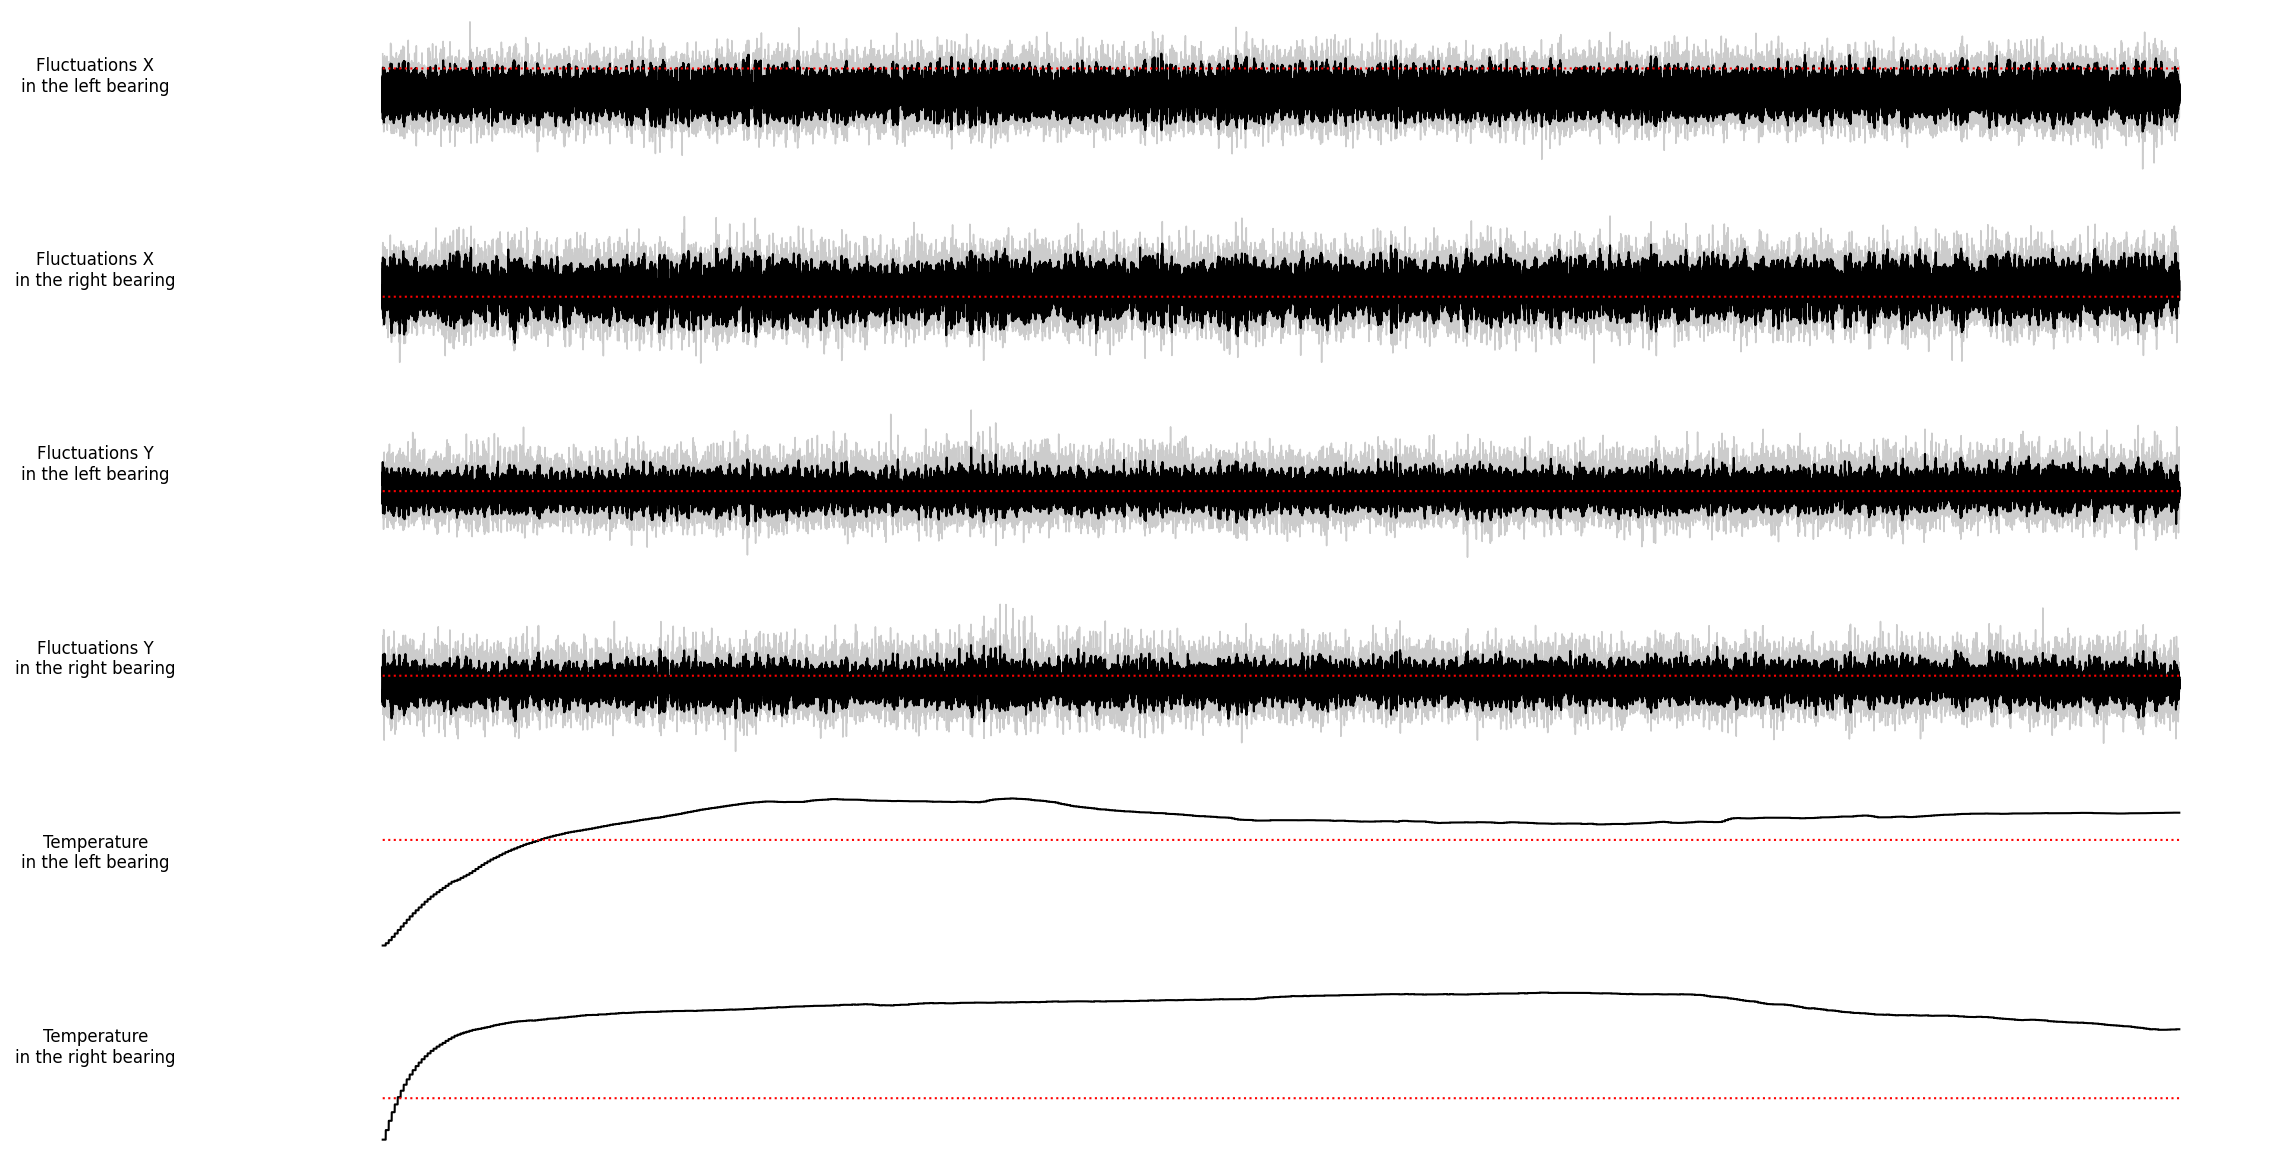

In [ ]:
img = Image("sparklines.png", width=1500)
img